# **Xitsonga Datasets**

# 1. Setup and Imports

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

nltk.download('punkt')
nltk.download('punkt_tab')

print("Setup Complete. All NLTK resources are ready.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Setup Complete. All NLTK resources are ready.


# 2. Load and Combine the Xitsonga Datasets

In [ ]:
try:
    df_train = pd.read_csv('train.tsv', sep='\t')
    df_dev = pd.read_csv('dev.tsv', sep='\t')
    df_test = pd.read_csv('test.tsv', sep='\t')

    df_xitsonga = pd.concat([df_train, df_dev, df_test], ignore_index=True)
    df_xitsonga.dropna(subset=['tweet', 'label'], inplace=True)

    print("Data loaded and combined successfully.")
    print(f"Total number of tweets: {len(df_xitsonga)}")
    print("\nFirst 5 rows of the combined data:")
    print(df_xitsonga.head())

except FileNotFoundError:
    print("Error: Make sure you have uploaded 'train.tsv', 'dev.tsv', and 'test.tsv' to the session storage.")

Data loaded and combined successfully.
Total number of tweets: 1261

First 5 rows of the combined data:
                                               tweet     label
0       @user Loku u navela Ku tissunga, tissungue🕳️  negative
1                          Aha... Auxeni ti nguavani  negative
2  Hahahahaha ih, tipo arrombaram o nhoster, 😂😂👏 ...  negative
3                              Hiiiii ni livrarih !!  negative
4                            @user 😱 oh hosi yanga 🙆  negative


# 3. Clean and Prepare the Text

In [ ]:
def clean_text(text):
    """
    Cleans a text string by lowercasing, removing links, mentions,
    and non-alphabetic characters.
    """
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_xitsonga['cleaned_tweet'] = df_xitsonga['tweet'].apply(clean_text)

df_xitsonga['tokens'] = df_xitsonga['cleaned_tweet'].apply(word_tokenize)

print("DataFrame after Cleaning and Tokenization:")
print(df_xitsonga[['tweet', 'cleaned_tweet', 'tokens', 'label']].head())

DataFrame after Cleaning and Tokenization:
                                               tweet  \
0       @user Loku u navela Ku tissunga, tissungue🕳️   
1                          Aha... Auxeni ti nguavani   
2  Hahahahaha ih, tipo arrombaram o nhoster, 😂😂👏 ...   
3                              Hiiiii ni livrarih !!   
4                            @user 😱 oh hosi yanga 🙆   

                             cleaned_tweet  \
0      loku u navela ku tissunga tissungue   
1                   aha auxeni ti nguavani   
2  hahahahaha ih tipo arrombaram o nhoster   
3                       hiiiii ni livrarih   
4                            oh hosi yanga   

                                           tokens     label  
0      [loku, u, navela, ku, tissunga, tissungue]  negative  
1                     [aha, auxeni, ti, nguavani]  negative  
2  [hahahahaha, ih, tipo, arrombaram, o, nhoster]  negative  
3                          [hiiiii, ni, livrarih]  negative  
4                               [

# 4. Visualize the Xitsonga Data

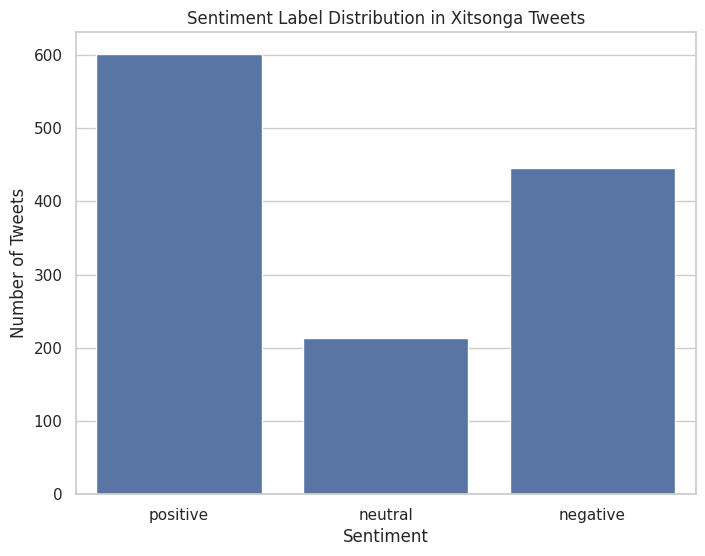

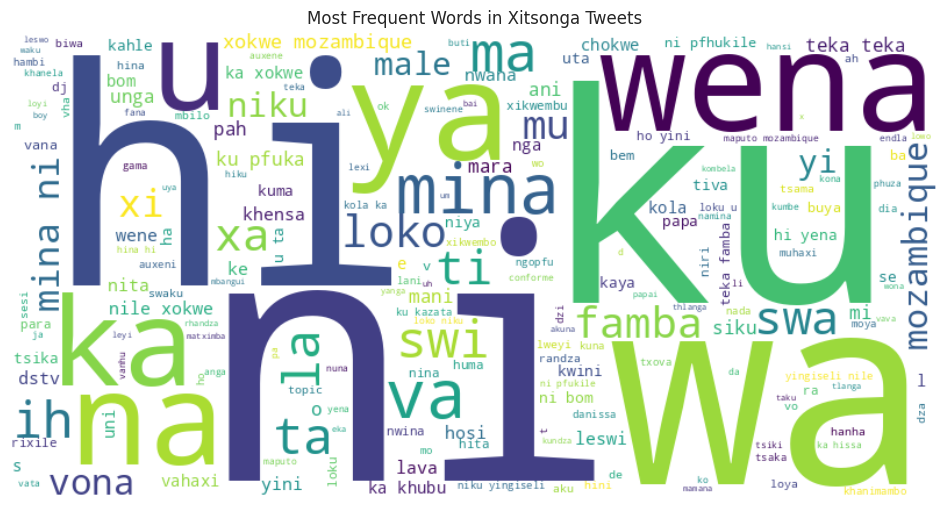

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_xitsonga, order=['positive', 'neutral', 'negative'])
plt.title('Sentiment Label Distribution in Xitsonga Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

all_words = ' '.join(df_xitsonga['cleaned_tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Xitsonga Tweets')
plt.show()

# 5. Handle Class Imbalance with SMOTE(Synthetic Minority Over-sampling Technique)


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df_xitsonga['cleaned_tweet'])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_xitsonga['label'])

print("Original class distribution:", Counter(y))
print("Labels mapping:", {i: label for i, label in enumerate(label_encoder.classes_)})

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nResampled class distribution:", Counter(y_resampled))
print("The classes are now balanced.")

Original class distribution: Counter({np.int64(2): 601, np.int64(0): 446, np.int64(1): 214})
Labels mapping: {0: 'negative', 1: 'neutral', 2: 'positive'}

Resampled class distribution: Counter({np.int64(0): 601, np.int64(1): 601, np.int64(2): 601})
The classes are now balanced.


# 6. Get Data Ready for Training (Train-Test Split)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

print("Shape of the training features:", X_train.shape)
print("Shape of the testing features:", X_test.shape)
print("Shape of the training labels:", y_train.shape)
print("Shape of the testing labels:", y_test.shape)

print("\nData is now cleaned, balanced, and split. It is ready for model training.")

Shape of the training features: (1442, 3639)
Shape of the testing features: (361, 3639)
Shape of the training labels: (1442,)
Shape of the testing labels: (361,)

Data is now cleaned, balanced, and split. It is ready for model training.


In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from google.colab import files

nltk.download('punkt')

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def clean_and_save(filename, output_name):
    df = pd.read_csv(filename, sep='\t')
    df.dropna(subset=['tweet', 'label'], inplace=True)
    df['cleaned_tweet'] = df['tweet'].apply(clean_text)
    df['tokens'] = df['cleaned_tweet'].apply(word_tokenize)
    df.to_csv(output_name, index=False)
    print(f"Saved cleaned data to {output_name}")
    files.download(output_name)  # triggers file download in Colab

# Run for each dataset
clean_and_save('train.tsv', 'train_cleaned.csv')
clean_and_save('dev.tsv', 'dev_cleaned.csv')
clean_and_save('test.tsv', 'test_cleaned.csv')


Saved cleaned data to train_cleaned.csv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved cleaned data to dev_cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved cleaned data to test_cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>